In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
# Example loading MNIST with one-hot labels:
import tensorflow as tf
import numpy as np

# Load dataset (example: MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images and normalize
x_train = x_train.reshape(-1, 28*28).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28*28).astype(np.float32) / 255.0

# One-hot encode labels
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)



In [4]:
# Define hyperparameters for the network architecture
# Define input/output dims
input_dim = 784
hidden1_units = 128
hidden2_units = 64
output_dim = 10

In [5]:
initializer = tf.keras.initializers.HeNormal()

W1 = tf.Variable(initializer(shape=(input_dim, hidden1_units)))
b1 = tf.Variable(tf.zeros([hidden1_units]))

W2 = tf.Variable(initializer(shape=(hidden1_units, hidden2_units)))
b2 = tf.Variable(tf.zeros([hidden2_units]))

W3 = tf.Variable(initializer(shape=(hidden2_units, output_dim)))
b3 = tf.Variable(tf.zeros([output_dim]))


In [6]:
#Dropout is like giving your brain a challenge by forcing it to learn with some of its memory turned off randomly for short periods. This helps it get stronger and smarter overall.
dropout_rate = 0.5  

def forward_pass(x, training=True):
    x = tf.cast(x, tf.float32)
    x = tf.reshape(x, [-1, 784])
    
    z1 = tf.matmul(x, W1) + b1
    a1 = tf.nn.relu(z1)
    if training:
        a1 = tf.nn.dropout(a1, rate=dropout_rate)

    z2 = tf.matmul(a1, W2) + b2
    a2 = tf.nn.relu(z2)
    if training:
        a2 = tf.nn.dropout(a2, rate=dropout_rate)

    logits = tf.matmul(a2, W3) + b3
    return logits



In [7]:
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))


In [8]:
def compute_accuracy(y_true, y_pred):
    correct_preds = tf.equal(tf.argmax(y_pred, axis=1), tf.argmax(y_true, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
    return accuracy


In [9]:
# Define optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.0005)


In [10]:
def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        y_pred = forward_pass(x_batch, training=True)
        loss = compute_loss(y_batch, y_pred)
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))
    return loss


In [11]:
epochs = 10
batch_size = 128

train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):
    # Shuffle training data each epoch
    indices = np.arange(x_train.shape[0])
    np.random.shuffle(indices)
    indices_tf = tf.convert_to_tensor(indices, dtype=tf.int32)
    x_train = tf.gather(x_train, indices_tf)
    y_train = tf.gather(y_train, indices_tf)

    # Mini-batch training
    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        loss = train_step(x_batch, y_batch)

    # Compute train and test losses and test accuracy
    y_train_pred = forward_pass(x_train)
    y_test_pred = forward_pass(x_test)

    train_loss = compute_loss(y_train, y_train_pred).numpy()
    test_loss = compute_loss(y_test, y_test_pred).numpy()
    test_acc = compute_accuracy(y_test, y_test_pred).numpy()

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")



Epoch 1, Train Loss: 0.5692, Test Loss: 0.5381, Test Accuracy: 0.8388
Epoch 2, Train Loss: 0.4093, Test Loss: 0.4048, Test Accuracy: 0.8864
Epoch 3, Train Loss: 0.3474, Test Loss: 0.3420, Test Accuracy: 0.9059
Epoch 4, Train Loss: 0.3011, Test Loss: 0.3126, Test Accuracy: 0.9129
Epoch 5, Train Loss: 0.2723, Test Loss: 0.2759, Test Accuracy: 0.9228
Epoch 6, Train Loss: 0.2527, Test Loss: 0.2681, Test Accuracy: 0.9238
Epoch 7, Train Loss: 0.2372, Test Loss: 0.2592, Test Accuracy: 0.9283
Epoch 8, Train Loss: 0.2179, Test Loss: 0.2353, Test Accuracy: 0.9346
Epoch 9, Train Loss: 0.2096, Test Loss: 0.2363, Test Accuracy: 0.9367
Epoch 10, Train Loss: 0.2004, Test Loss: 0.2148, Test Accuracy: 0.9399


In [12]:
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")

Final Test Accuracy: 0.9399


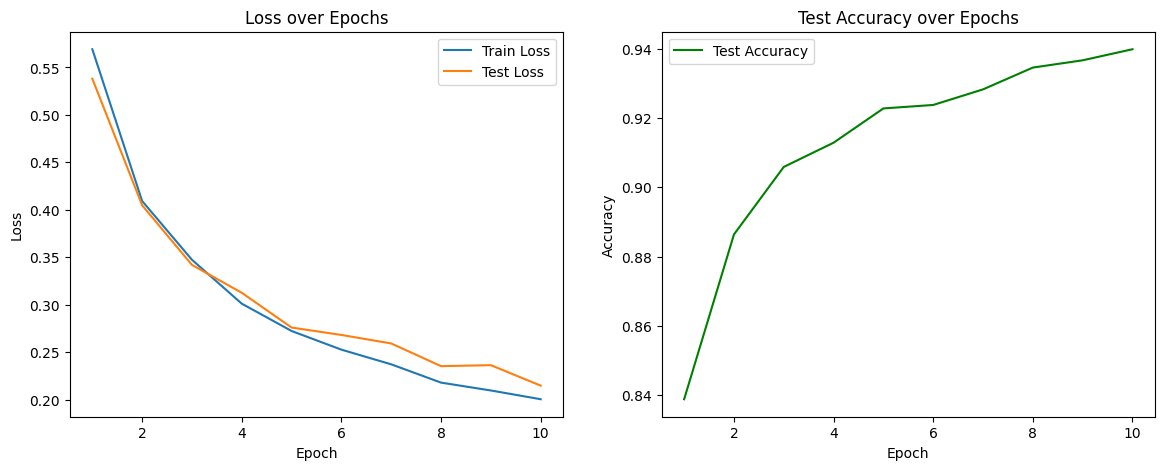

In [13]:
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()

plt.show()
